# Scale-invarient Feature Transform (SIFT)
- It is a feature extraction method used in image classification tasks
- It is used for detecting and describing local features (keypoints) in an image
- With the help of those features machines can recognize variations of same images just like humans

# Advantages of SIFT keypoints 
- SIFT keypoints are used as features for image during model training
- The major advantage of SIFT features are over edge features (or) HOG(Histogram of Oriented Gradients) features
- SIFT keypoints are not affected by size and orientation of the image

Is sift used in face recognition?

# ENTIRE SIFT PROCESS CAN BE DIVIDED INTO 4 PARTS
- `*Constructing a scale space:*` Making features independent of their scales
[(refer this to understand scale spacing in images)](https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20162017/LectureNotes/IP/ScaleSpace/index.html#:~:text=The%20size%20(scale)%20of%20the,the%20flowers%20near%20the%20horizon.)

- `*Keypoint localisation:*` Identifying unique keypoints in the features.

- `*Orientation Assignment:*` Making sure that the keypoints are independent of their orientation(rotation invarient)

- `*Keypoint descriptor:*` Assigning fingerprint to the keypoints 

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# SIFT is also known as blob detector

# Remove points with high edge response by using hessian (using 2nd derivative) because it is unstable to noise

# Find orientation of keypoint (magnitude and angle) to be invariant to rotation

# Define keypoint by creating HOG features

# After getting the vectors we do keypoint matching using nearest neighbour and L2 distance to find minimum error between histogram vectors

(1152, 648, 3)


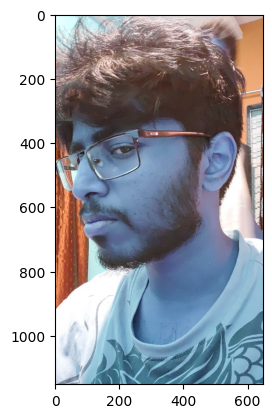

In [5]:
maple = './inputs/face1.jpg'
img = cv2.imread(maple)
print(img.shape)
# flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
plt.imshow(img,cmap='gray')

# Feature Matching Using ORB and Brute Force Matcher

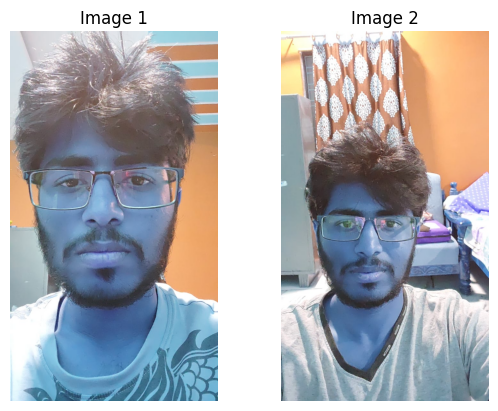

In [7]:
face1 = cv2.imread('./inputs/face.jpg',)
face2 = cv2.imread('./inputs/face4.jpg',)
fig, axs = plt.subplots(1, 2)

axs[0].imshow(face1)
axs[0].axis('off')  # Turn off axis numbers
axs[0].set_title('Image 1')

axs[1].imshow(face2)
axs[1].axis('off')
axs[1].set_title('Image 2')

plt.show()

In [13]:
sift = cv2.ORB_create()

kp1,desc1 = sift.detectAndCompute(face1,None)

kp2,desc2 = sift.detectAndCompute(face2,None)


True

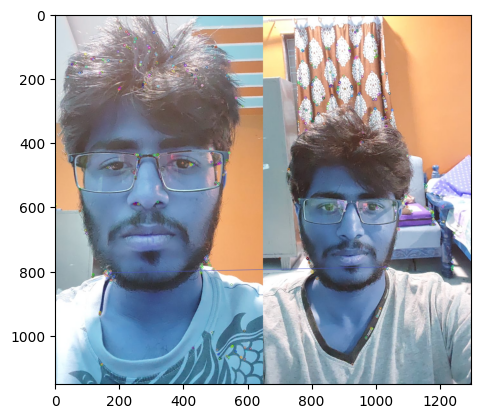

In [22]:
BF = cv2.BFMatcher()
matches = BF.knnMatch(desc1,desc2,k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
matched_img = cv2.drawMatches(face1, kp1, face2, kp2, good_matches, None, )
plt.imshow(matched_img)
cv2.imwrite('./results/face_match.jpg',matched_img)

In [20]:
flann = cv2.FlannBasedMatcher()

In [21]:
flann_matches = flann.match(desc1,desc2)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\flann\src\miniflann.cpp:336: error: (-210:Unsupported format or combination of formats) in function 'cv::flann::buildIndex_'
> type=0
> 